In [1]:
import cem_mini
import cem_mini.cem_examples as cem_examples

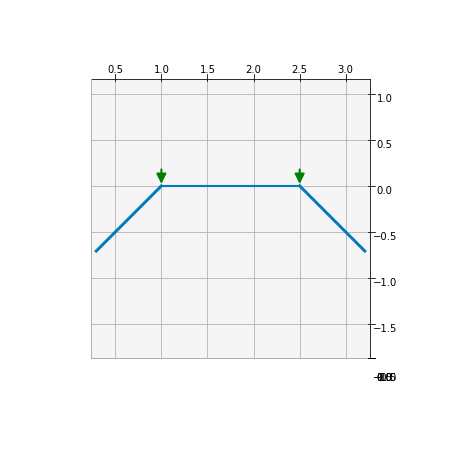

In [2]:
cem_examples.quick_start_2d();

iteration 7 error 8.583734e-09 finished.


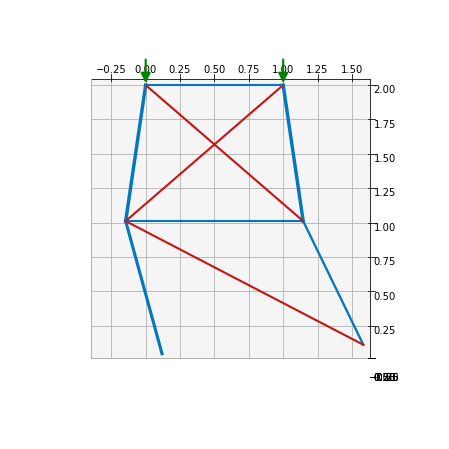

In [3]:
cem_examples.braced_tower_2d();

iteration 3 error 0.0 finished.


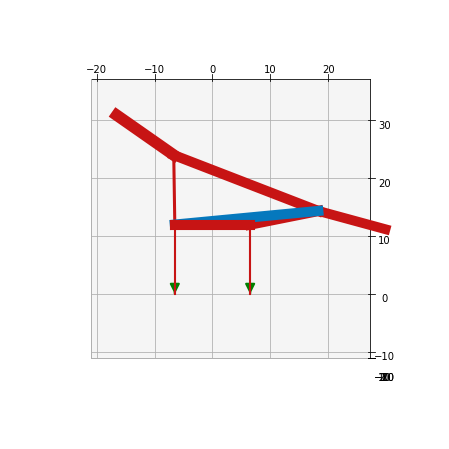

In [4]:
cem_examples.bridge_2d();

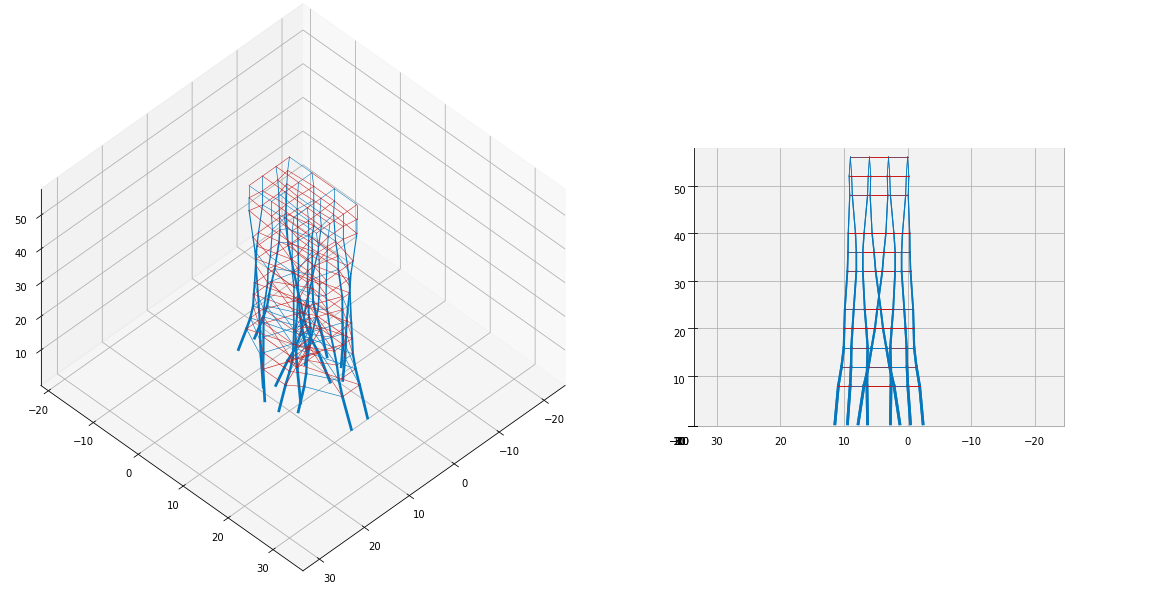

In [5]:
cem_examples.random_tower(4,4,12);